<a href="https://colab.research.google.com/github/MichaelHalaj/Data-Science-CS301/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `numba` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 


## Question 1 (20 points)

Generate N uniform distributed over the interval [0,1] random variables $\{x_1, \dots x_N\}$. 

Compute their mean and after repeating such computation $m$ times, plot the  histogram as $N$ takes values ${1, 5, 10, 20}$. 

Provide a justification of the resultant histogram by reading about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). 

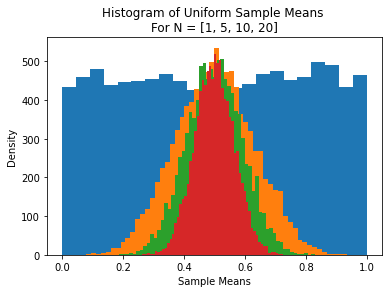

In [ ]:
"""Answer to 1"""
import numpy as np
import random
from matplotlib import pyplot as plt

"""Justification of Resultant Histogram: 
CLT states that "when independent random variables are summed up, their properly
normalized sum tends toward a normal distribution." In addition, "by the law of
larges numbers, the samples averages converge almost surely to the expected mean
as n approaches infinity." In the histogram, it can be seen that as n becomes larger
(or approaches infinity) the sample averages converge to the expected mean of 0.5
and distribution becomes more "normal."
"""

def create(N_array, m: int, interval_0, interval_1):
  """Function creates a histogram that plots means of random variables that was 
  generated after m computations
  """
  plt.title("Histogram of Uniform Sample Means \nFor N = " + str(N_array))
  plt.ylabel("Density")
  plt.xlabel("Sample Means")

  idx = 1
  for N in N_array: #iterate over input as N takes values in N_array

    uniform = np.random.uniform(interval_0, interval_1, (m,N)) #generate N uniform distributed over the interval [0,1]
    mean = np.mean(uniform, axis = 1) #compute mean over rows in resultant uniform array
    plt.hist(mean, bins = 'auto') #plots the mean with auto sized width bins

  plt.show() #show the resultant histogram

data = [1,5,10,20]
m = 10000
interval = [0,1]
create(data, m, interval[0], interval[1])



## Question 2 (20 points) 

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

Simulate and plot the bivariate normal distribution with the shown parameters. 

You need to use the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 

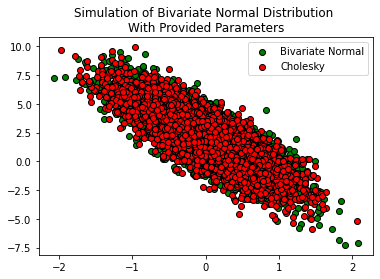

In [ ]:
"""Answer to 2"""
import numpy as np
import matplotlib.pyplot as plt


def plot_bivariate_normal(mean, cov_matrix, color):
  """Plots the bivariate normal distrubution with provided params"""
  x, y = np.random.multivariate_normal(mean, cov_matrix, 5000).T
  plt.scatter(x, y, c = color, edgecolors ='black', label = 'Bivariate Normal')


def generate_cholesky_matrix(mean, cov_matrix, n):
  """Function that uses cholesky decomp. and formula mu + L * Y to generate 
  a matrix with x, y points that can be plotted"""


  p = len(mean)

  sample = np.array(np.random.normal(size = p * n)) #draw random samples from normal distr. and puts into 1d array
  Y = np.resize(sample, [p, n]) #creates a p * n matrix instead of 1d matrix
  #Z : random samples from a normal distribution

  L = np.linalg.cholesky(cov_matrix)
  X = np.matmul(L, Y) #multiply matrices L and X

  return X + mean
  
mean_col = np.array([[0],[2]]) #used for cholesky
mean_row = [0,2] #used for bivariate normal distrubution

cov_matrix = np.array([[0.3, -1], [-1, 5]])
x, y = generate_cholesky_matrix(mean_col, cov_matrix, 5000)

plt.title("Simulation of Bivariate Normal Distribution \nWith Provided Parameters")


plot_bivariate_normal(mean_row, cov_matrix, 'green') #bivariate normal distrubtion that checks if cholesky factorization is approximately correct
plt.scatter(x, y, c = 'red', edgecolors = 'black', label = 'Cholesky') #cholesky
 

plt.legend(loc = 'upper right')
plt.show()
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html"""





## Question 3 (30 points)

1. Simulate coin tossing experiments involving a biased coin with probability of heads is $p_H=0.6$ and $n_{trials} = [0, 5, 15, 50, 500]$ (10 points)

2. Assume you don't know $p_H$ and you need to estimate it. Plot the estimate as a function of the number of trials. Comment on the accuracy of the estimate for small vs. large trials. (10 points)

3. Calculate the variance of the estimated $p_H$ (10 points). Comment on its behavior as a function of the true $p_H$ itself and the $n_{trials}$. 


Number of Heads: [  0   1  10  31 294]



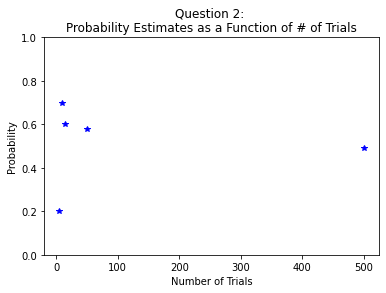


Variance: 0.029085439999999997


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Answer to 3.1

def simulate_coin_flip(n , p: float):
  """When n is array, returns array of result of simulation for each trial given
  p"""
  return np.random.binomial(n, p)

n_trials = [0, 5, 15, 50, 500]
p_H = 0.6 #Probability of landing heads
print("Number of Heads: " + str(simulate_coin_flip(n_trials, p_H)) +"\n")
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html



#Answer to 3.2

"""Explanation:
As number of trials becomes bigger, the estimate probability of landing heads
becomes closer to the true probability of landing heads, which 0.5
"""

def plot_function(n, p: float):
  """Uses the previous function to simulate a coin flip, then divides that result
  with the array of trials to get the estimate probability; plots the results 
  on a chart; returns estimated probability for next question"""


  plt.plot(n, est_prob, 'b*')
  plt.ylim(0, 1) 
  plt.xlabel("Number of Trials")
  plt.ylabel("Probability")
  plt.title("Question 2: \nProbability Estimates as a Function of # of Trials")
  plt.show()

  return est_prob

p_H_estimate = 1/2
n_trials = [5, 10, 15, 50, 500]
coin_flip_result = simulate_coin_flip(n_trials, p_H_estimate)
est_prob = np.divide(coin_flip_result, n_trials) #divides result with n trials to get probability estimate
est = plot_function(n_trials, p_H_estimate)
print();


#Answer to 3.3

"""Explanation:
  As n becomes larger and estimated p_H becomes closer to true p_H, then 
  the variance becomes smaller.
"""
def calculate_variance(n, p):
  """Calculates and returns variance"""
  return np.var(n)
  

#def get_variance(n, p):
  #return [calculate_variance(n[i], p[i]) for i in range(len(n))]

#list_of_vars = get_variance(n_trials, est_prob)
variance  = np.var(est_prob)
print("Variance: " + str(variance))




# Question 4 (30 points)

![](points-on-line.png)

1. We monitor server faults in a data center over a period of T units of time and represents each occurring fault as a point on the line. What is the probability that k faults take place between $t_1$ and $t_2$ if $n$ total points were recorded ?  (10 points)

2. We collected a very large set of faults $n \rightarrow \infty$ over a long measurement interval $T \rightarrow \infty$  and we observed that on average faults occur with a rate of $\lambda = \frac{n}{T}$.   This [allows us](https://en.wikipedia.org/wiki/Poisson_limit_theorem) to model the probability of $k_a$ points in an interval $t_a$ as [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution).  Suppose that we measure $k_a$ and $k_b$ faults in two consecutive intervals of durations $t_a=(t_1, t_2)$ and $t_b=(t_2, t_3)$ respectively where $t_a+t_b < T$, write the expression of the joint probability $$p(k_a \in t_a, k_b \in t_b)$$. (10 points)

3. Suppose now that we need to schedule personnel to replace these servers and we are interested to use the fault data to estimate the probability of $$p(k_a \in t_a | k_c \in t_c)$$ where $t_c=t_a + t_b$. Write the expression of this conditional probability.  (10 points)

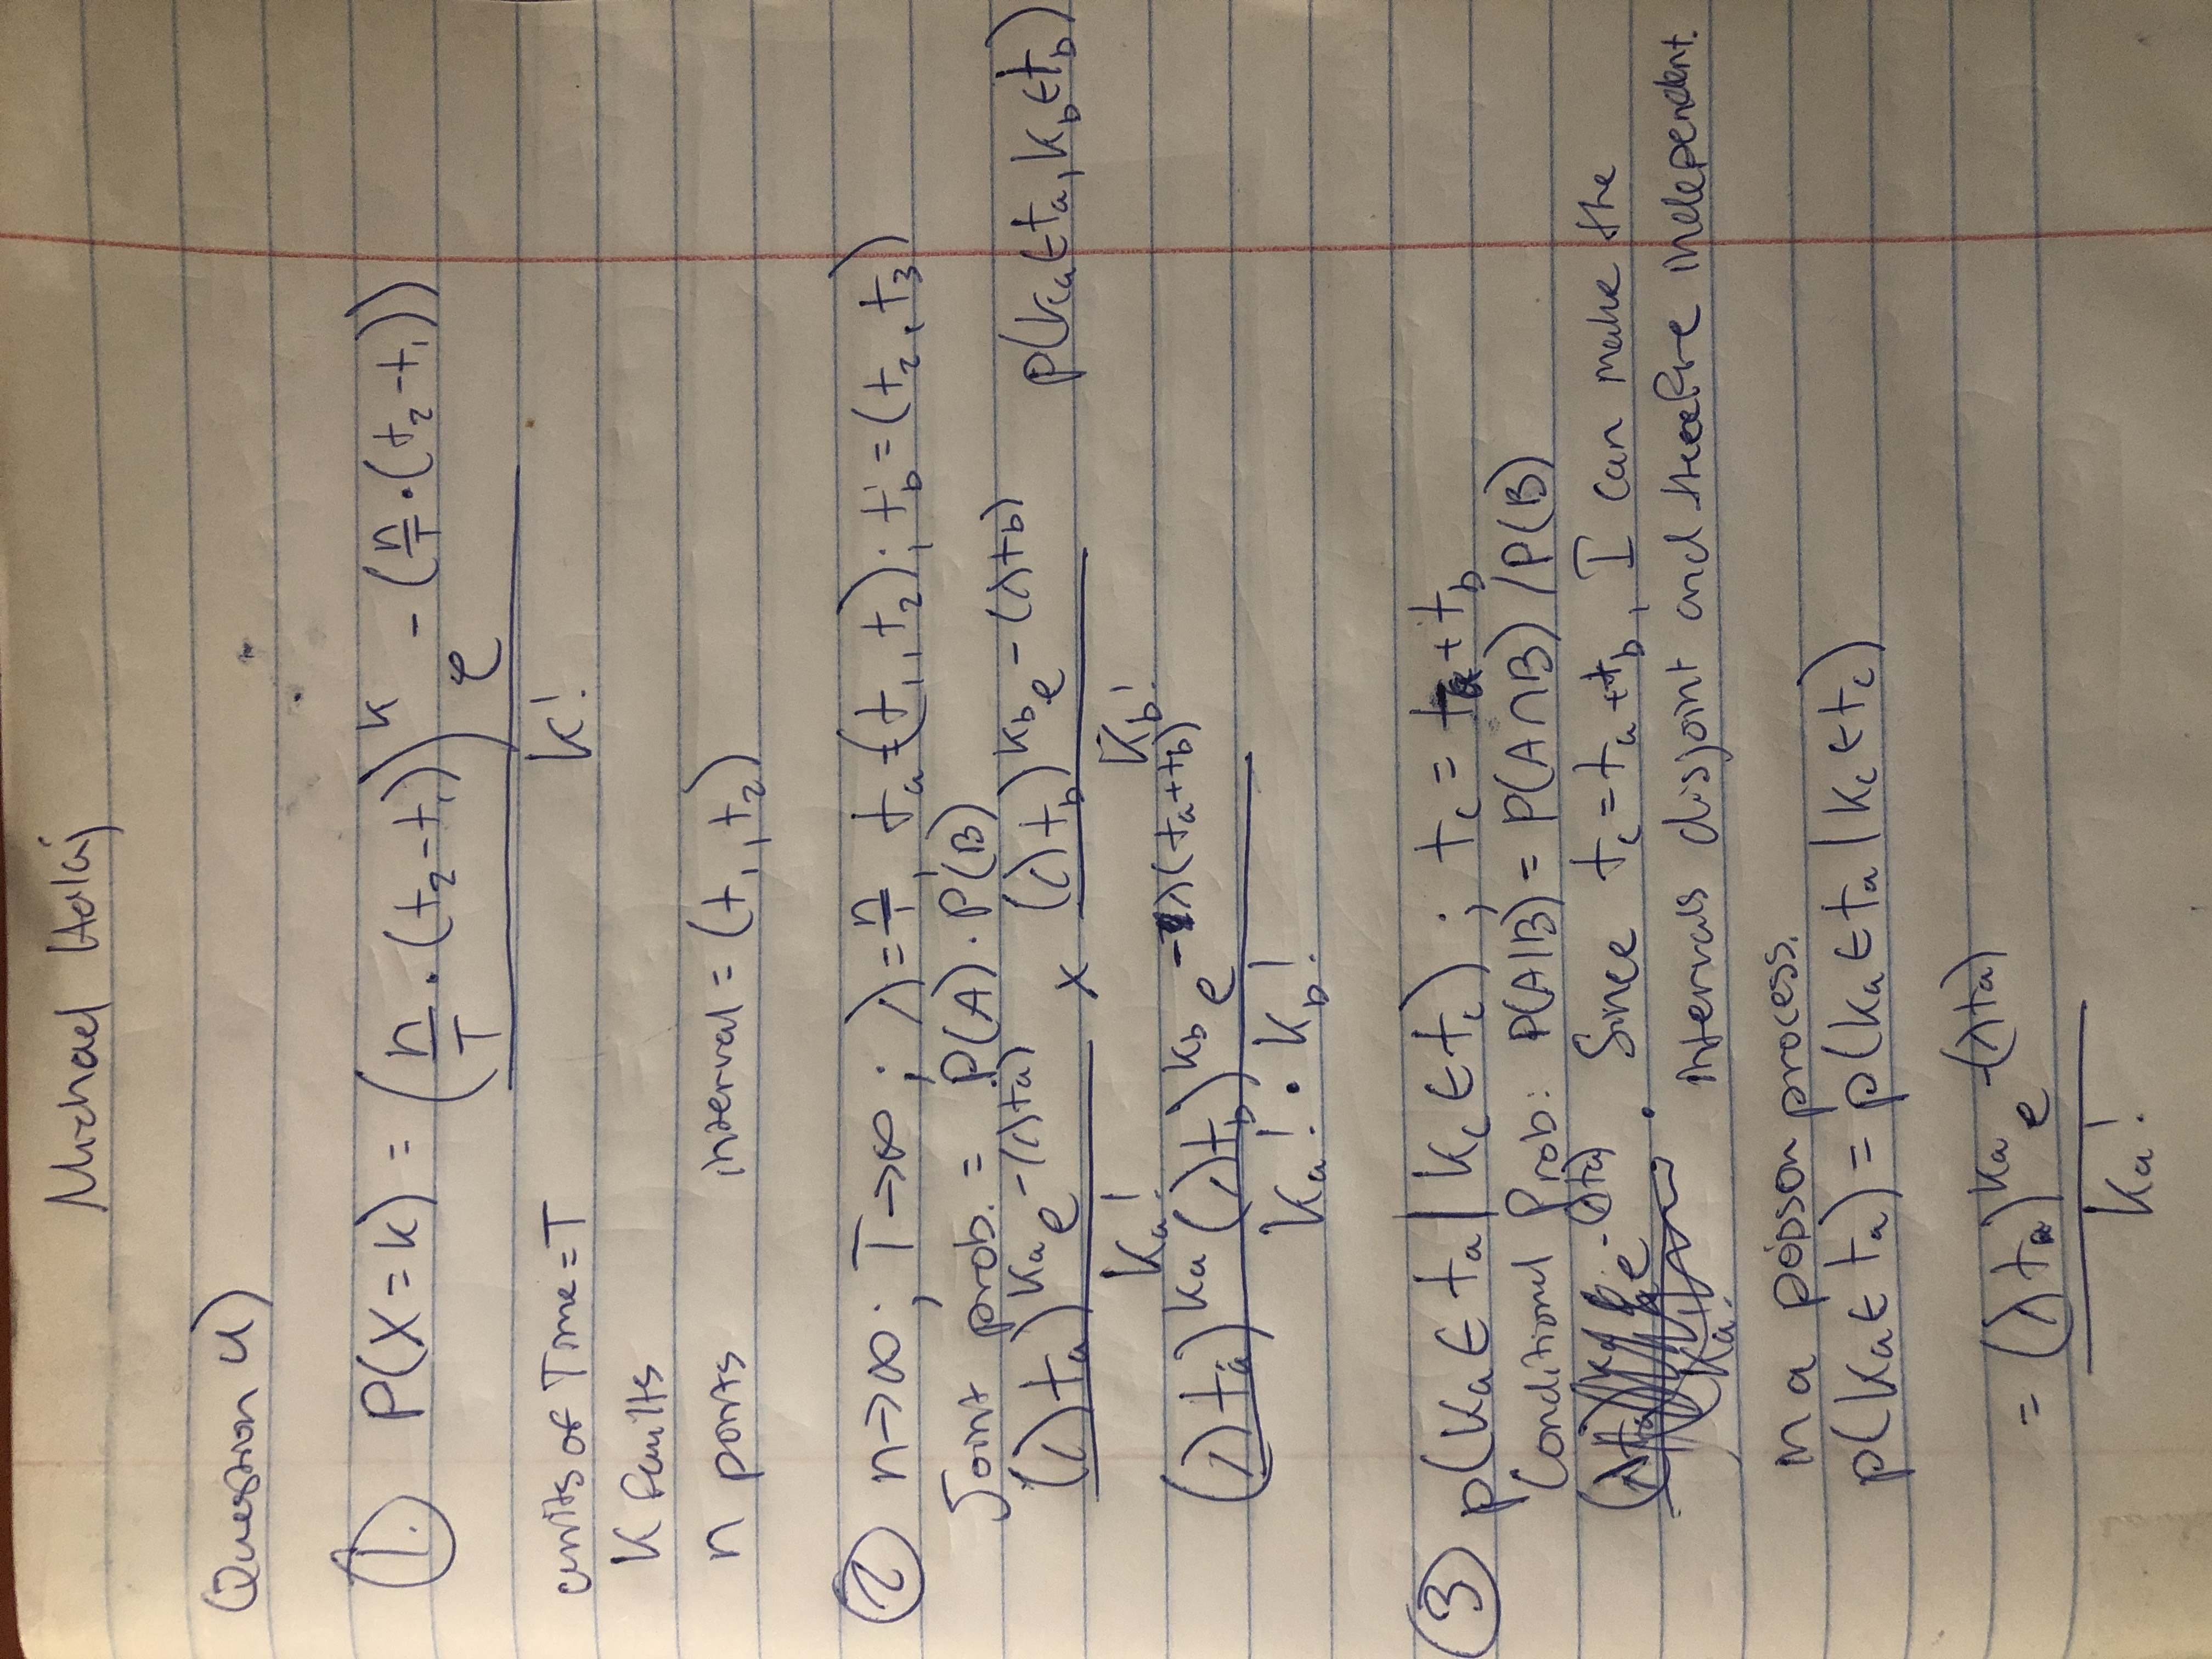